### Gmarket
- 베스트 상품 200개 데이터 수집
- 상품의 이미지 200개 다운로드

In [48]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

#### 1. URL 찾기

In [2]:
url = 'https://www.gmarket.co.kr/n/best'

#### 2. request > response : str(html)

In [3]:
response = requests.get(url)
response

<Response [200]>

#### 3. bs > DataFrame

In [4]:
response.text[:500]

'<!DOCTYPE html><html lang="ko" class="no-js"><head><meta name="viewport" content="width=980"/><meta charSet="utf-8"/><meta http-equiv="X-UA-Compatible" content="ie=edge"/><meta name="description" content="인터넷쇼핑,오픈마켓,패션/뷰티,디지털,식품/유아,스포츠/자동차,생활용품,도서/DVD,여행/항공권,e쿠폰/티켓,만화/게임,공동구매,경매,중고,글로벌쇼핑,브랜드샵,베스트셀러,방문쇼핑몰,G스탬프,할인쿠폰,동영상,이벤트 등 G마켓"/><meta name="keywords" content="베스트100,베스트셀러,경매,할인쿠폰,베스트셀러,공동구매,컴퓨터/핸드폰,에어컨/TV/디카,MP3/게임,패션/명품/브랜드,여성의류/속옷,남성의류/정장/빅사이즈,분유/기저귀/식품/생리대/임부복,유아동/장난감,쌀/과일/한우/생선,건강식품/음료,화장품/'

In [5]:
dom = BeautifulSoup(response.text, 'html.parser')
type(dom)

bs4.BeautifulSoup

In [7]:
elements = dom.select('#gBestWrap > div.best-list > ul > li')
len(elements), elements[0]

(200,
 <li class="first"><span class="box__corners-id"></span><p class="no1">1</p><div class="thumb"><a aria-hidden="true" href="http://item.gmarket.co.kr/Item?goodscode=3113057185&amp;ver=20230825" tabindex="-1"><img alt="네추럴라이즈 키즈 멀티비타민 C/D 60꾸미 3종 3병" class="image__lazy" decoding="async" height="210" loading="lazy" src="//gdimg.gmarket.co.kr/3113057185/still/300?ver=20230825" width="210"/></a></div><a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=3113057185&amp;ver=20230825">네추럴라이즈 키즈 멀티비타민 C/D 60꾸미 3종 3병</a><div class="item_price"><div class="o-price"><span class="for-a11y">정가</span><span>22,900<!-- -->원</span></div><div class="s-price"><span class="for-a11y">할인가</span><strong><span>21,760<!-- -->원</span></strong> <span><span class="sale"></span><em>4<!-- -->%</em></span></div><div class="icon"><img alt="무료배송" src="//pics.gmkt.kr/pc/ko/corner/gbest/ic_freeshipping.gif"/></div></div></li>)

In [20]:
element = elements[0]
data = {
    'title':element.select_one('.itemname').text,
    'link':element.select_one('.itemname').get('href'),
    'img':'http:' + element.select_one('.image__lazy').get('src'),
    'o_price':element.select_one('.o-price').text,
    's_price':element.select_one('.s-price').text.split(' ')[0],
}
data

{'title': '네추럴라이즈 키즈 멀티비타민 C/D 60꾸미 3종 3병',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=3113057185&ver=20230825',
 'img': 'http://gdimg.gmarket.co.kr/3113057185/still/300?ver=20230825',
 'o_price': '정가22,900원',
 's_price': '할인가21,760원'}

In [21]:
items = []
for element in elements:
    items.append({
        'title':element.select_one('.itemname').text,
        'link':element.select_one('.itemname').get('href'),
        'img':'http:' + element.select_one('.image__lazy').get('src'),
        'o_price':element.select_one('.o-price').text,
        's_price':element.select_one('.s-price').text.split(' ')[0],
    })
items[:2]

[{'title': '네추럴라이즈 키즈 멀티비타민 C/D 60꾸미 3종 3병',
  'link': 'http://item.gmarket.co.kr/Item?goodscode=3113057185&ver=20230825',
  'img': 'http://gdimg.gmarket.co.kr/3113057185/still/300?ver=20230825',
  'o_price': '정가22,900원',
  's_price': '할인가21,760원'},
 {'title': '[CGV](CGV) G마켓 예매권(금요특가_8/25)',
  'link': 'http://item.gmarket.co.kr/Item?goodscode=3075338164&ver=20230825',
  'img': 'http://gdimg.gmarket.co.kr/3075338164/still/300?ver=20230825',
  'o_price': '정가15,000원',
  's_price': '할인가9,980원'}]

In [22]:
df = pd.DataFrame(items)
df.tail(2)

,title,link,img,o_price,s_price
198,[또온나](4장세트 쿠폰가11610원) 여성 노와이어 데일리 브라 편안하게 잡아주는...,http://item.gmarket.co.kr/Item?goodscode=23405...,http://gdimg.gmarket.co.kr/2340557643/still/30...,"정가43,000원","할인가12,900원"
199,[르블랑페이우] 벨라 샤 스커트,http://item.gmarket.co.kr/Item?goodscode=30046...,http://gdimg.gmarket.co.kr/3004616640/still/30...,"정가50,000원","할인가40,000원"


In [23]:
df[['o_price','s_price']].tail(2)

,o_price,s_price
198,"정가43,000원","할인가12,900원"
199,"정가50,000원","할인가40,000원"


In [28]:
def change_number(data):
    return (data.replace(',', '')[2:-1])
change_number('정가43,000원')

'43000'

In [31]:
df1 = df.copy()
df1['o_price'] = df1['o_price'].apply(change_number)
df1[['o_price','s_price']].head()

,o_price,s_price
0,22900,"할인가21,760원"
1,15000,"할인가9,980원"
2,25800,"할인가12,900원"
3,,"할인가45,900원"
4,325000,"할인가144,900원"


In [5]:
# 텍스트 데이터 전처리 : 정규표현식
import re
def change_number(data):
    return re.findall('[0-9,]+', data)[0].replace(',','')
change_number('할인가144,900원')

'144900'

In [36]:
df2 = df1.copy()
df2['s_price'] = df2['s_price'].apply(change_number)
df2[['o_price','s_price']].head()

,o_price,s_price
0,22900,21760
1,15000,9980
2,25800,12900
3,,45900
4,325000,144900


In [41]:
# 데이터선택 = 수정할데이터
df2['o_price'].loc[df2['o_price'] == ''] = df2['s_price']

In [42]:
df2[['o_price','s_price']].head()

,o_price,s_price
0,22900,21760
1,15000,9980
2,25800,12900
3,45900,45900
4,325000,144900


In [43]:
df2.dtypes

title      object
link       object
img        object
o_price    object
s_price    object
dtype: object

In [44]:
df2['o_price'] = df2['o_price'].astype('int')
df2['s_price'] = df2['s_price'].astype('int')
df2.dtypes

title      object
link       object
img        object
o_price     int32
s_price     int32
dtype: object

In [50]:
# 할인율 컬럼 추가

df2['discount'] = np.round((1-df2['s_price']/df2['o_price']) * 100,2)
df2.tail(2)

,title,link,img,o_price,s_price,discount
198,[또온나](4장세트 쿠폰가11610원) 여성 노와이어 데일리 브라 편안하게 잡아주는...,http://item.gmarket.co.kr/Item?goodscode=23405...,http://gdimg.gmarket.co.kr/2340557643/still/30...,43000,12900,70.0
199,[르블랑페이우] 벨라 샤 스커트,http://item.gmarket.co.kr/Item?goodscode=30046...,http://gdimg.gmarket.co.kr/3004616640/still/30...,50000,40000,20.0


#### 4. download image

In [51]:
df3 = df2.copy() 
df3 = df3[['title', 'img']] 
df3.tail(2)

,title,img
198,[또온나](4장세트 쿠폰가11610원) 여성 노와이어 데일리 브라 편안하게 잡아주는...,http://gdimg.gmarket.co.kr/2340557643/still/30...
199,[르블랑페이우] 벨라 샤 스커트,http://gdimg.gmarket.co.kr/3004616640/still/30...


In [52]:
import os
dname = 'imgs'
os.path.exists(dname)

False

In [54]:
if not os.path.exists(dname):
    os.makedirs(dname)

In [55]:
%ls imgs

 C 드라이브의 볼륨: WINDOWS
 볼륨 일련 번호: 1CE2-C115

 C:\Users\user\Web_Crawling\day2\imgs 디렉터리

2023-08-25  오후 02:51    <DIR>          .
2023-08-25  오후 02:51    <DIR>          ..
               0개 파일                   0 바이트
               2개 디렉터리  169,726,271,488 바이트 남음


In [57]:
link = df3.loc[0, 'img']
link

'http://gdimg.gmarket.co.kr/3113057185/still/300?ver=20230825'

In [58]:
response = requests.get(link)
response

<Response [200]>

In [59]:
response.text[:100]

"����\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00��\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&')*)\x19\x1f-0-(0%()(��\x00C\x01\x07\x07\x07\n\x08\n"

In [60]:
with open(f'{dname}/test.png', 'wb') as file:
    file.write(response.content)

In [61]:
%ls imgs

 C 드라이브의 볼륨: WINDOWS
 볼륨 일련 번호: 1CE2-C115

 C:\Users\user\Web_Crawling\day2\imgs 디렉터리

2023-08-25  오후 02:56    <DIR>          .
2023-08-25  오후 02:56    <DIR>          ..
2023-08-25  오후 02:56            24,430 test.png
               1개 파일              24,430 바이트
               2개 디렉터리  169,725,521,920 바이트 남음


In [62]:
from PIL import Image as pil

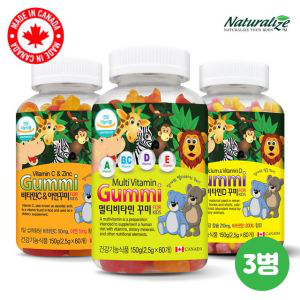

In [63]:
pil.open(f'{dname}/test.png')

In [69]:
for idx, data in (df3[:5].iterrows()):
    print(idx, data['img'])
    response = requests.get(data['img'])
    with open(f'{dname}/{idx}.png', 'wb') as file:
        file.write(response.content)

0 http://gdimg.gmarket.co.kr/3113057185/still/300?ver=20230825
1 http://gdimg.gmarket.co.kr/3075338164/still/300?ver=20230825
2 http://gdimg.gmarket.co.kr/2105251652/still/300?ver=20230825
3 http://gdimg.gmarket.co.kr/2219928058/still/300?ver=20230825
4 http://gdimg.gmarket.co.kr/3139517831/still/300?ver=20230825


In [70]:
%ls imgs

 C 드라이브의 볼륨: WINDOWS
 볼륨 일련 번호: 1CE2-C115

 C:\Users\user\Web_Crawling\day2\imgs 디렉터리

2023-08-25  오후 03:07    <DIR>          .
2023-08-25  오후 03:06    <DIR>          ..
2023-08-25  오후 03:07            24,430 0.png
2023-08-25  오후 03:07             8,482 1.png
2023-08-25  오후 03:07             6,736 2.png
2023-08-25  오후 03:07            19,080 3.png
2023-08-25  오후 03:07            24,065 4.png
2023-08-25  오후 02:56            24,430 test.png
               6개 파일             107,223 바이트
               2개 디렉터리  169,723,199,488 바이트 남음


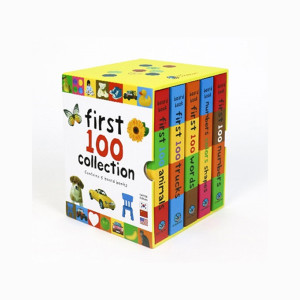

In [74]:
pil.open(f'{dname}/4.png')

In [75]:
# png, jpg